In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
import math


Question1

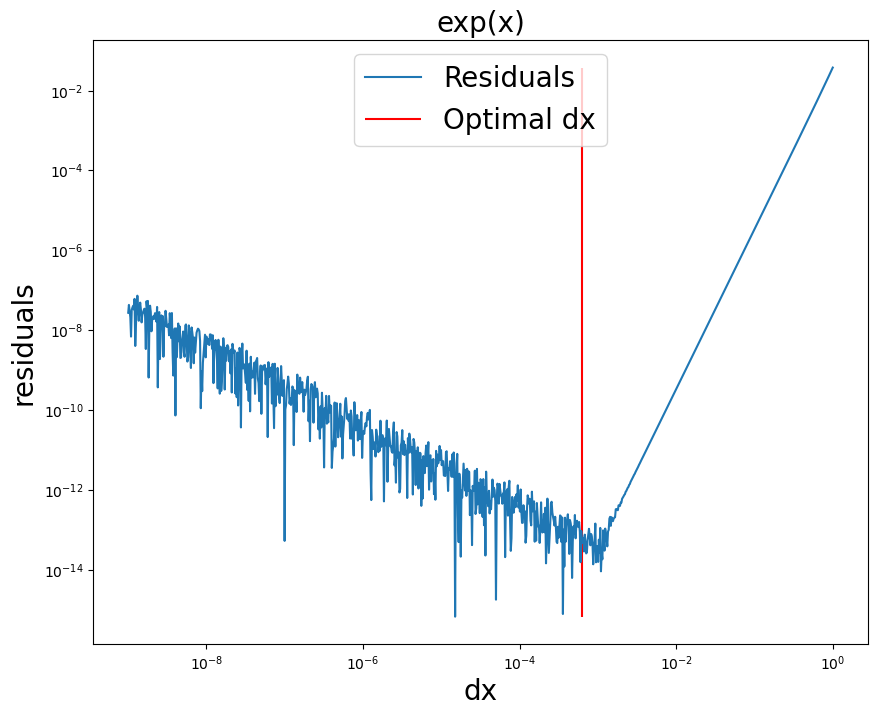

In [41]:
# Making a log-range for dx
logdx=np.linspace(-9,0,1001)
dx=10**logdx

#argument constant in argument of exp()
a = 1

#Defining our our function to be differentiated 
def fun(x):
    return np.exp(a*x)

#Setting the point we are differentiating at 
x0=0

#Evaluating the functions at the four points of interest
y0 =fun(x0)
y1=fun(x0+dx)
y2=fun(x0-dx)
y3=fun(x0+2*dx)
y4=fun(x0-2*dx)

#Numerical first derivative
d_num = (-y3+8*y1-8*y2+y4)/(12*dx)

#Evaluating the true deriative
dy_dx= a*fun(x0)

#Evaluating the true fifth derivative
d5y_d5x = a**5*fun(x0)

#optiomal dx 
dx_opt = (1e-16*y0/(d5y_d5x))**(1/5)

#Computing residuals
res = np.abs(dy_dx-d_num)


#make a log plot of our errors in the derivatives
plt.figure(figsize=(10, 8), dpi=100)
plt.loglog(dx,res, label="Residuals")
plt.vlines(dx_opt,min(res), max(res), color="red", label="Optimal dx")
plt.legend(loc="upper center", fontsize="20")
plt.xlabel("dx", fontsize="20")
plt.ylabel("residuals", fontsize="20")
plt.title("exp(x)", fontsize="20")


plt.savefig("exp(x).png")


Question 2

In [5]:
# In order to compute the optimal dx we need to evaluate th third derivative
# to do I will use a central third derivative with +/-h, +/-2h where
# h will be set to h = 0.01 has it seems like a resonable value 

def ndiff(fun,x,full=False):
    
    #computing the optimal dx

    h = 0.01
    y0 = fun(x)
    y1 = fun(x+h)
    y2 = fun(x-h)
    y3 = fun(x+2*h)
    y4 = fun(x-2*h)

    d3y_d3x = (y3-2*y1+2*y2-y4)/h**3 #third derivative

    dx = ((1e-16*y0)/d3y_d3x)**(1/3) #optimal dx

    if math.isnan(dx) : #In case the dx got a nan 
      dx = 1e-4

    
    #Evalutaing our function at x +/- dx
    yy1 = fun(x+dx)
    yy2 = fun(x-dx)
    
    #Evaluating the derivative of the function with optimal dx
    df_dx = (yy1-yy2)/(2*dx)

    if full == False:
      return df_dx
    
    else:
      error  = 1e-16*y0/dx + d3y_d3x*dx**2/3
      return df_dx, error

    

In [44]:
ndiff(np.sin, 1, full=False)

/tmp/ipykernel_156612/660926180.py:18: RuntimeWarning: invalid value encountered in double_scalars
  dx = ((1e-16*y0)/d3y_d3x)**(1/3) #optimal dx


0.5403023049677103

In [46]:
ndiff(np.sin,1, full=True)

/tmp/ipykernel_156612/660926180.py:18: RuntimeWarning: invalid value encountered in double_scalars
  dx = ((1e-16*y0)/d3y_d3x)**(1/3) #optimal dx


(0.5403023049677103, -3.601083851834783e-09)

/tmp/ipykernel_156612/660926180.py:29: RuntimeWarning: invalid value encountered in double_scalars
  df_dx = (yy1-yy2)/(2*dx)
/tmp/ipykernel_156612/660926180.py:35: RuntimeWarning: invalid value encountered in double_scalars
  error  = 1e-16*y0/dx + d3y_d3x*dx**2/3
/tmp/ipykernel_156612/660926180.py:18: RuntimeWarning: invalid value encountered in double_scalars
  dx = ((1e-16*y0)/d3y_d3x)**(1/3) #optimal dx


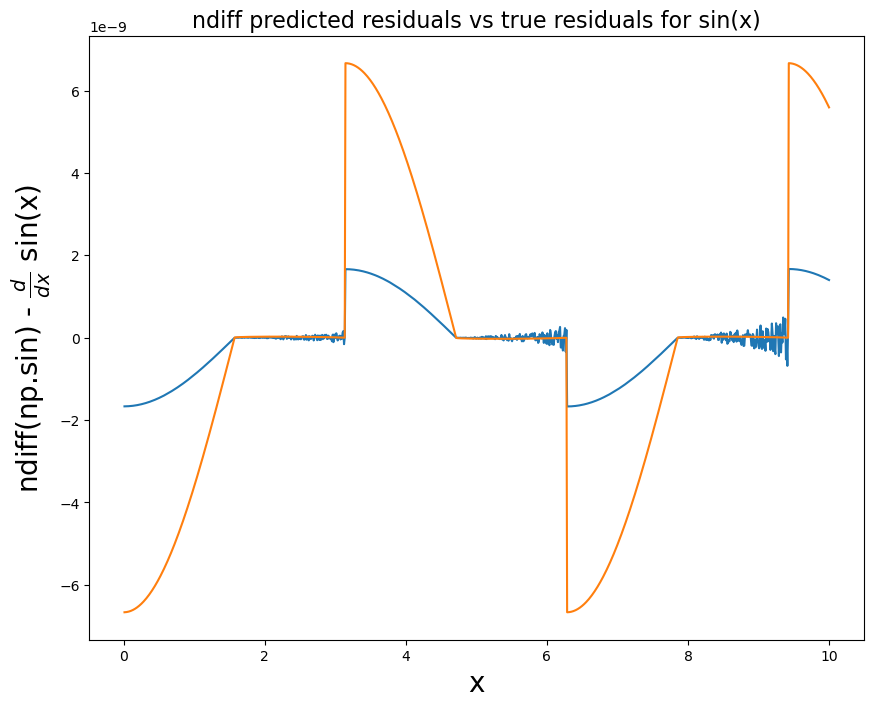

In [60]:
from tkinter import font


xfine = np.linspace(0,10,1000)

predicted_res = np.zeros(len(xfine))
true_res = np.zeros(len(xfine))

for i in range(len(xfine)):
    ndiff_output = ndiff(np.sin,xfine[i],full=True)

    true_res[i] += ndiff_output[0]-np.cos(xfine[i])
    predicted_res[i] += ndiff_output[1]

plt.figure(figsize=(10, 8), dpi=100)
plt.plot(xfine, true_res)
plt.plot(xfine, predicted_res)
plt.title("ndiff predicted residuals vs true residuals for sin(x)", fontsize="16")
plt.xlabel("x", fontsize="20")
plt.ylabel("ndiff(np.sin) - $\\frac{d}{dx}$ sin(x)", fontsize="20")

plt.savefig("ndiff.png")


Question 3


In [7]:
data = np.transpose(np.loadtxt("lakeshore.txt"))

In [8]:
def lakeshore(V,data):
  
    if type(V) == int or type(V) == float:
        V = np.array([V])
    if type(V) == list:
        V = np.array(V)
    

    x=np.flip(data[1])
    y=np.flip(data[0])


    spln=interpolate.splrep(x,y)
    spline_T=interpolate.splev(V,spln)

    #fitting a line between the 2 nearest points 
    line_T = np.zeros(len(V))
    for i in range(len(V)):  
        ind=np.max(np.where(V[i]>=x))
        x_use=x[ind:ind+2]
        y_use=y[ind:ind+2]
        pars=np.polyfit(x_use,y_use,1)
        pred = np.polyval(pars,V[i])
        line_T[i]=pred

    error = np.abs(line_T-spline_T)

    print("Temperature interpolation = ", spline_T)
    print("Estimated error =", error)

    return spline_T, error



Temperature interpolation =  [192.44416255  33.38617731  19.85525937]
Estimated error = [0.00851531 0.00274331 0.00088792]


<ErrorbarContainer object of 3 artists>

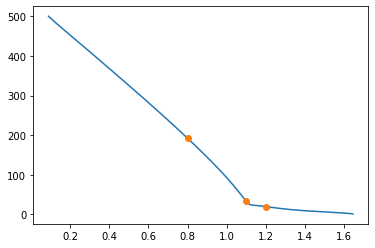

In [169]:
lake = lakeshore([0.8,1.1,1.2],data)
plt.plot(data[1],data[0])
plt.errorbar( [0.8,1.1,1.2], [lake[0][0], lake[0][1], lake[0][2]] , [lake[1][0], lake[1][1], lake[1][2]], fmt="o")

In [170]:
#Her I am inputing only a number
lakeshore(0.8, data)

Temperature interpolation =  [192.44416255]
Estimated error = [0.00851531]


(array([192.44416255]), array([0.00851531]))

Question 4


In [136]:

#fun=np.cos


def fun(x):
    return 1/(1+x**2)

#n=5 #numerator order (for poly)
#m=6 #denominator order

n=2
m=2

x=np.linspace(-np.pi/2,np.pi/2,n+m+1)
y=fun(x)

pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y

#now that we have coefficients, we can see how well we did
xfine=np.linspace(-np.pi/2,np.pi/2,1001)

p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)





In [137]:
y_pred=p/qq
y_true=fun(xfine)

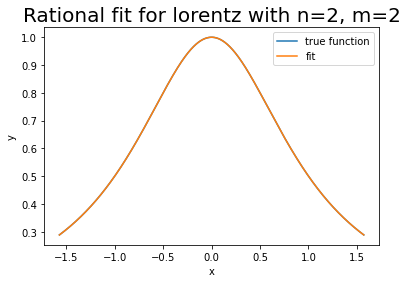

In [138]:
plt.plot(xfine,fun(xfine), label="true function")
plt.plot(xfine,y_pred, label="fit")
plt.title("Rational fit for lorentz with n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()

plt.savefig("Rat_lorentz_n2.png")

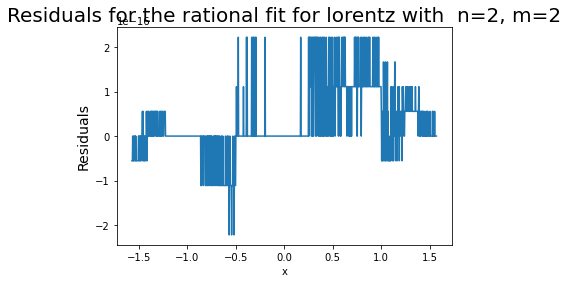

In [139]:

plt.plot(xfine,y_pred-y_true)
plt.title("Residuals for the rational fit for lorentz with  n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("Residuals", fontsize="14")
plt.xlabel("x")

plt.savefig("res_rat_lorentz_n2.png")

In [140]:
#use numpy to fit same-order polynomial
poly_coeffs=np.polyfit(x,y,len(y)-1)
y_poly=np.polyval(poly_coeffs,xfine)


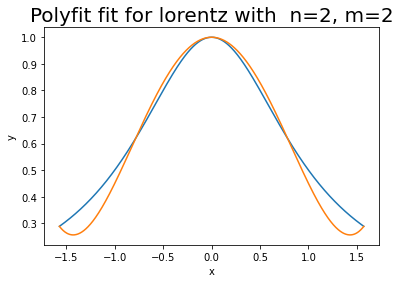

In [141]:
plt.plot(xfine,fun(xfine))
plt.plot(xfine,y_poly)
plt.title("Polyfit fit for lorentz with  n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("y")
plt.xlabel("x")

plt.savefig("poly_lorentz_n2.png")

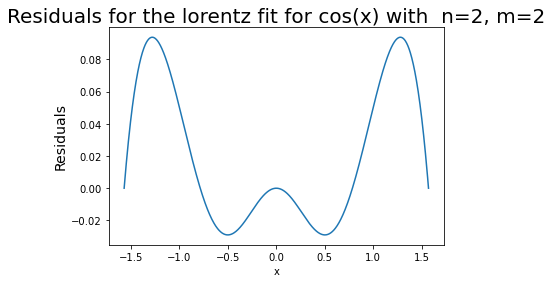

In [142]:
plt.plot(xfine,fun(xfine)-y_poly)
plt.title("Residuals for the lorentz fit for cos(x) with  n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("Residuals", fontsize="14")
plt.xlabel("x")

plt.savefig("res_lorentz_cos_n2.png")

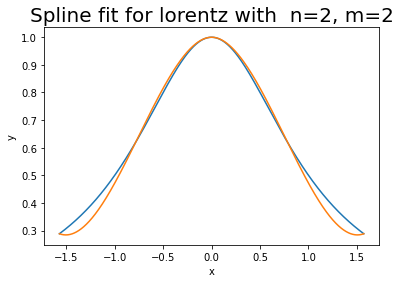

In [143]:
spln=interpolate.splrep(x,y)
yy=interpolate.splev(xfine,spln)

plt.plot(xfine,fun(xfine))
plt.plot(xfine,yy)
plt.title("Spline fit for lorentz with  n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("y")
plt.xlabel("x")

plt.savefig("spline_lorentz_n2.png")

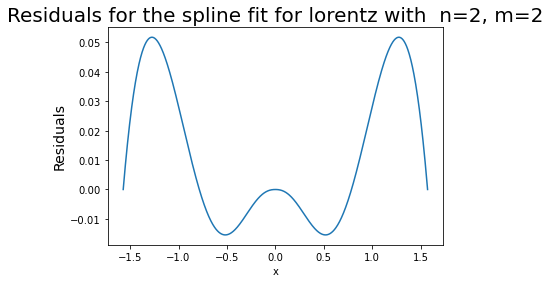

In [144]:
plt.plot(xfine,fun(xfine)-yy)
plt.title("Residuals for the spline fit for lorentz with  n=%i, m=%i" %(n,m), fontsize="20")
plt.ylabel("Residuals", fontsize="14")
plt.xlabel("x")

plt.savefig("res_spline_lorentz_n2.png")